# Data Preparation , Once and for all for flatten time series!

Let's summarize the data preparation we are performing for the different statics models we are building 

The aim of this notebook is to detail the function "get_data_merged_dynamic_flatten()" we have created for the transplant.tools.dataset classe.

In [6]:
from transplant.tools.dataset import Dataset 

dataset = Dataset()

X_train, X_test , y_train, y_test , X_col = dataset.get_data_merged_dynamic_flatten()

Static merged with Flattent Dynamic (i.e. : took the mean for each time serie).
You can chose between One_Hot encoding ([0,1] , [1,0]) with 'One_Hot' for target data or not with 'cls'.
You can chose to center and reduce your data with the train set data with 'True'


C:\Users\Delanoue\Documents\GitHubRepo\batch_5_transplant\transplant\tools\dataset.py:172: FutureWarning: 'id_patient' is both a column name and an index level.
Defaulting to column but this will raise an ambiguity error in a future version
  ['id_patient']).mean().mean()
C:\Users\Delanoue\Documents\GitHubRepo\batch_5_transplant\transplant\tools\dataset.py:178: FutureWarning: 'id_patient' is both a column name and an index level.
Defaulting to column but this will raise an ambiguity error in a future version
  ['id_patient'], as_index=False).mean()
C:\Users\Delanoue\Documents\GitHubRepo\batch_5_transplant\transplant\tools\dataset.py:180: FutureWarning: 'id_patient' is both a column name and an index level.
Defaulting to column but this will raise an ambiguity error in a future version
  ['id_patient'], as_index=False).mean()


In [1]:
import pandas as pd
import numpy as np

from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
%matplotlib inline

In [2]:
from transplant.tools.dataset import Dataset

dataset = Dataset()

train_static_0, test_static_0 = dataset.get_static()

In [3]:
train_static_str_to_num = train_static_0.apply(
    pd.to_numeric, errors='coerce').dropna(1, how="all")

mean_train_static = train_static_str_to_num.mean()

train_static_filled = train_static_str_to_num.fillna(mean_train_static)

In [4]:
test_static_filled = test_static_0.apply(
    pd.to_numeric, errors='coerce').dropna(1, how="all").fillna(mean_train_static)

Here we make sure we got the same columns in train and test (static)

In [5]:
drop_test = []
drop_train = []
train_static_columns = train_static_filled.columns
test_static_columns = test_static_filled.columns

for i in train_static_filled.columns:
    if not(i in test_static_columns):
        drop_train += [i]

for i in test_static_columns:
    if not(i in train_static_filled.columns):
        drop_test += [i]
drop_test, drop_train

train_static_filled = train_static_filled.drop(drop_train, axis=1)
test_static_filled = test_static_filled.drop(drop_test, axis=1)

In [6]:
train_static_filled.shape, test_static_filled.shape

((287, 36), (123, 36))

A function to rescale our data

In [7]:
def center_reduce_data(X_train, X_test):
    mean_train = X_train.mean()
    std_train = X_test.std()

    return (X_train-mean_train)/std_train, (X_test-mean_train)/std_train

Train static we use for the moment

In [8]:
train_static = train_static_filled
test_static = test_static_filled

# Dynamic

In [9]:
train_dynamic_0, test_dynamic_0 = dataset.get_dynamic()

In [10]:
train_dynamic_0.columns

Index(['id_patient', 'time', 'B.I.S', 'BIS SR', 'DC', 'ET Des.', 'ET Sevo.',
       'ETCO2', 'ETCO2 (mmHg)', 'ETO2', 'FC', 'FICO2', 'FICO2 (mmHg)', 'FIN2O',
       'FR', 'FR(ecg)', 'FiO2', 'MAC', 'NMT TOF', 'NMTratio', 'PAPdia',
       'PAPmoy', 'PAPsys', 'PASd', 'PASm', 'PASs', 'PEEPtotal', 'PNId', 'PNIm',
       'PNIs', 'Pmax', 'Pmean', 'Pplat', 'RR(co2)', 'SpO2', 'SvO2 (m)', 'Temp',
       'VT'],
      dtype='object')

## ATTENTION ! HERE 30 patients missing in dynamic ...

In [11]:
static_id = train_static['id_patient'].sort_values().unique()
dynamic_id = train_dynamic_0['id_patient'].unique()

In [12]:
static_id.shape, dynamic_id.shape

((287,), (254,))

In [13]:
in_static_not_in_dynamic = []
in_dynamic_not_in_static = []
for i in static_id:
    if not(i in dynamic_id):
        in_static_not_in_dynamic += [i]
for i in dynamic_id:
    if not(i in static_id):
        in_dynamic_not_in_static += [i]
in_static_not_in_dynamic, in_dynamic_not_in_static

([8,
  69,
  104,
  169,
  183,
  196,
  212,
  242,
  279,
  280,
  281,
  282,
  283,
  289,
  290,
  291,
  293,
  294,
  297,
  298,
  299,
  303,
  306,
  307,
  310,
  317,
  332,
  339,
  350,
  353,
  374,
  385,
  402],
 [])

In [14]:
def plot_serie_patient(X, patient_id, variable):
    # On choisit la variable à observer dans table_col au dessus
    df = X[X['id_patient'] == patient_id].sort_values('time')
    # Ici j'initialise le temps à 0. Càd le début est à 0.
    df['time'] -= df['time'].iloc[0]
    df = df.set_index('time')
    plt.title('Evolution de la variable "'+variable+'" du patient '+str(patient_id) +
              "| Durée de l'opération : "+str(df.index[-1]), y=1.05, size=25)
    plt.plot(df[variable])

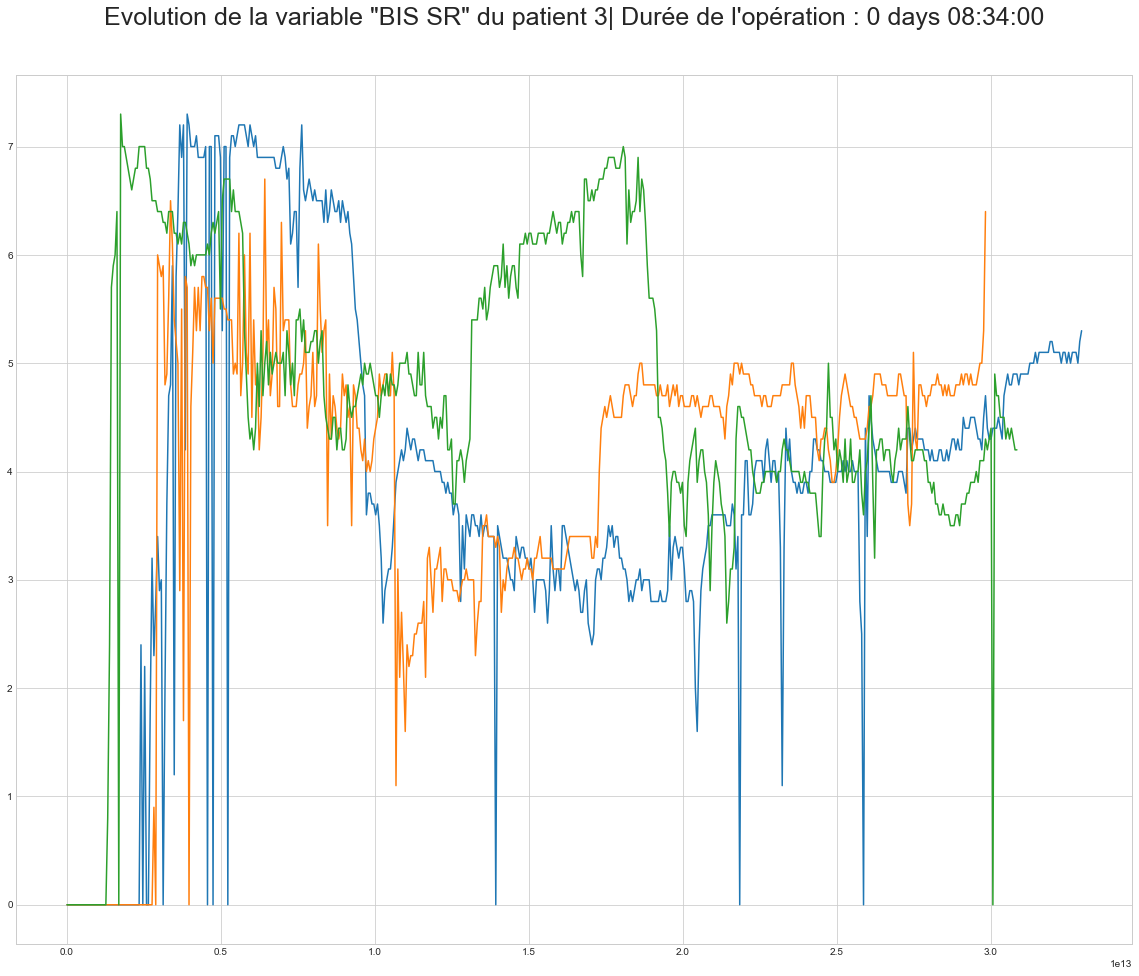

In [15]:
fig = plt.figure(figsize=(20, 16))
plot_serie_patient(train_dynamic_0, 1, 'BIS SR')
plot_serie_patient(train_dynamic_0, 2, 'BIS SR')
plot_serie_patient(train_dynamic_0, 3, 'BIS SR')

### Replace NaN dynamic with mean train_set

In [16]:
mean_dynamic_train = train_dynamic_0.groupby(['id_patient']).mean().mean()

C:\Users\Delanoue\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 'id_patient' is both a column name and an index level.
Defaulting to column but this will raise an ambiguity error in a future version
  """Entry point for launching an IPython kernel.


In [17]:
train_dynamic = train_dynamic_0.fillna(mean_dynamic_train)
test_dynamic = test_dynamic_0.fillna(mean_dynamic_train)

In [18]:
train_dynamic_flat = train_dynamic.groupby(
    ['id_patient'], as_index=False).mean()
test_dynamic_flat = test_dynamic.groupby(['id_patient'], as_index=False).mean()

C:\Users\Delanoue\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 'id_patient' is both a column name and an index level.
Defaulting to column but this will raise an ambiguity error in a future version
  """Entry point for launching an IPython kernel.
C:\Users\Delanoue\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 'id_patient' is both a column name and an index level.
Defaulting to column but this will raise an ambiguity error in a future version
  


In [19]:
train_dynamic_flat.head()

,id_patient,B.I.S,BIS SR,DC,ET Des.,ET Sevo.,ETCO2,ETCO2 (mmHg),ETO2,FC,...,PNIm,PNIs,Pmax,Pmean,Pplat,RR(co2),SpO2,SvO2 (m),Temp,VT
0,1,0.000000,3.933455,2.159181,5.162343,67.881818,79.889091,0.041091,0.000000,75.409091,...,26.841797,44.334312,94.780000,32.358545,39.114921,50.768785,73.548611,74.272795,89.033889,86.528374
1,2,0.000000,3.924900,2.159181,5.162343,0.000000,73.142570,111.773092,0.044578,0.000000,...,30.102410,283.871486,5.582329,16.311245,39.114921,50.768785,73.548611,74.272795,89.033889,86.528374
2,3,0.000000,4.741165,2.159181,5.162343,80.361165,105.893204,0.046990,0.000000,87.947573,...,26.841797,44.334312,99.075728,31.779806,39.114921,50.768785,73.548611,74.272795,89.033889,86.528374
3,4,2.710227,0.000000,2.159181,5.162343,4.432670,66.355114,109.735795,0.106818,0.000000,...,247.534091,44.334312,13.326705,97.178977,39.114921,50.768785,73.548611,74.272795,89.033889,86.528374
4,9,0.000000,0.000000,2.159181,5.162343,0.410330,7.307912,0.000000,72.002198,121.824176,...,0.000000,18.041758,2.931868,4.134066,95.969231,29.140220,361.628571,74.272795,89.033889,86.528374


### Sum up before merging

In [20]:
train_static.columns

Index(['Age_donor', 'Aspirations_donor', 'BMI_donor', 'Donneur_CPT',
       'Insuffisance_renale', 'LAS', 'PAPS', 'PFO', 'PF_donor', 'Poids',
       'Poids_donor', 'RX_donor', 'Sex_donor', 'Tabagisme_donor', 'Taille',
       'Taille_donor', 'age', 'body_mass_index', 'diabetes', 'id_patient',
       'other_organ_transplantation', 'oto_score', 'pathologie',
       'plasmapherese', 'preoperative_ECMO', 'preoperative_ICU',
       'preoperative_mechanical_ventilation',
       'preoperative_pulmonary_hypertension', 'preoperative_vasopressor',
       'retransplant', 'sexe', 'super_urgence', 'thoracic_surgery_history',
       'time_on_waiting_liste', 'transplanted_twice_during_study_period',
       'target'],
      dtype='object')

## Merge dynamic and static

In [21]:
def merge_dyn_sta(X_train_static, X_train_dynamic, X_test_static, X_test_dynamic):
    return pd.merge(X_train_static, X_train_dynamic, on='id_patient'), pd.merge(X_test_static, X_test_dynamic, on='id_patient')

In [22]:
train_glob, test_glob = merge_dyn_sta(
    train_static, train_dynamic_flat, test_static, test_dynamic_flat)

In [23]:
train_glob.columns

Index(['Age_donor', 'Aspirations_donor', 'BMI_donor', 'Donneur_CPT',
       'Insuffisance_renale', 'LAS', 'PAPS', 'PFO', 'PF_donor', 'Poids',
       'Poids_donor', 'RX_donor', 'Sex_donor', 'Tabagisme_donor', 'Taille',
       'Taille_donor', 'age', 'body_mass_index', 'diabetes', 'id_patient',
       'other_organ_transplantation', 'oto_score', 'pathologie',
       'plasmapherese', 'preoperative_ECMO', 'preoperative_ICU',
       'preoperative_mechanical_ventilation',
       'preoperative_pulmonary_hypertension', 'preoperative_vasopressor',
       'retransplant', 'sexe', 'super_urgence', 'thoracic_surgery_history',
       'time_on_waiting_liste', 'transplanted_twice_during_study_period',
       'target', 'B.I.S', 'BIS SR', 'DC', 'ET Des.', 'ET Sevo.', 'ETCO2',
       'ETCO2 (mmHg)', 'ETO2', 'FC', 'FICO2', 'FICO2 (mmHg)', 'FIN2O', 'FR',
       'FR(ecg)', 'FiO2', 'MAC', 'NMT TOF', 'NMTratio', 'PAPdia', 'PAPmoy',
       'PAPsys', 'PASd', 'PASm', 'PASs', 'PEEPtotal', 'PNId', 'PNIm', 'PNIs',
  

In [24]:
train_glob

,Age_donor,Aspirations_donor,BMI_donor,Donneur_CPT,Insuffisance_renale,LAS,PAPS,PFO,PF_donor,Poids,...,PNIm,PNIs,Pmax,Pmean,Pplat,RR(co2),SpO2,SvO2 (m),Temp,VT
0,41,3.0,25.689562,5550.000000,0.0,39.300000,68.884058,0.000000,457.000000,43.0,...,13.818565,97.567511,8.554852,11.316456,25.084388,319.518987,73.548611,74.272795,89.033889,86.528374
1,43,2.0,19.531250,4750.000000,0.0,31.700000,68.884058,0.000000,497.000000,51.0,...,10.253235,7.972274,97.070240,4.621072,39.114921,10.683919,15.297597,74.272795,12.414048,84.619224
2,51,3.0,28.685145,5250.000000,0.0,51.900000,55.000000,0.000000,240.000000,55.0,...,15.554113,10.049784,101.073593,6.781385,39.114921,12.164502,15.777056,74.272795,16.573593,99.038961
3,34,3.0,31.960227,7000.000000,1.0,36.300000,38.000000,0.000000,152.000000,65.0,...,2.077922,2.762692,29.160567,11.672963,8.363636,13.626919,95.077922,41.903188,23.368005,228.924439
4,63,0.0,22.892820,4450.000000,0.0,37.400000,40.000000,0.000000,390.000000,70.0,...,67.487725,82.481178,19.743044,25.382979,39.114921,97.399345,5.214403,74.272795,89.033889,31.117840
5,40,3.0,25.538191,5100.000000,0.0,49.400000,49.000000,0.000000,530.000000,52.0,...,10.579098,42.413744,7.273443,3.597709,39.114921,14.570150,182.082319,52.964241,53.308442,176.916188
6,59,1.0,18.730489,4450.000000,0.0,48.600000,50.000000,1.000000,366.000000,78.0,...,25.990157,11.722441,78.492126,86.446850,1.562992,1.807087,2.218504,74.272795,14.023622,97.582677
7,40,1.0,17.441264,5500.000000,0.0,34.600000,68.884058,0.000000,400.000000,63.0,...,2.492415,3.233372,4.432905,31.715286,39.114921,4.399067,18.451575,74.272795,97.617270,32.902450
8,59,1.0,20.408163,6900.000000,0.0,41.200000,75.000000,0.000000,376.000000,74.0,...,12.892405,75.753165,4.827306,6.072333,31.579838,319.929476,73.548611,74.272795,89.033889,86.528374
9,18,1.0,23.183673,6900.000000,0.0,43.200000,41.000000,0.000000,370.000000,55.0,...,15.513776,96.722853,1.666126,2.012966,28.884927,263.841167,73.548611,74.272795,89.033889,86.528374


## Final Data 

In [25]:
dic_to_One_Hot = {0: [1, 0], 1: [0, 1]}

In [26]:
X_train = np.array(train_glob.drop(['target'], axis=1))
X_test = np.array(test_glob.drop(['target'], axis=1))

y_train_cls = np.array(train_glob['target'])
y_train_hot = np.array(list(train_glob['target'].map(dic_to_One_Hot)))

y_test_cls = np.array(test_glob['target'])
y_test_hot = np.array(list(test_glob['target'].map(dic_to_One_Hot)))

In [27]:
X_train

array([[4.10000000e+01, 3.00000000e+00, 2.56895619e+01, ...,
        7.42727953e+01, 8.90338889e+01, 8.65283741e+01],
       [4.30000000e+01, 2.00000000e+00, 1.95312500e+01, ...,
        7.42727953e+01, 1.24140481e+01, 8.46192237e+01],
       [5.10000000e+01, 3.00000000e+00, 2.86851447e+01, ...,
        7.42727953e+01, 1.65735931e+01, 9.90389610e+01],
       ...,
       [5.40000000e+01, 1.00000000e+00, 2.55381907e+01, ...,
        7.42727953e+01, 8.90338889e+01, 8.65283741e+01],
       [4.60000000e+01, 1.00000000e+00, 2.05714286e+01, ...,
        2.97738523e+01, 2.54652695e+02, 8.65283741e+01],
       [2.50000000e+01, 3.00000000e+00, 2.05000000e+01, ...,
        7.42727953e+01, 9.89111111e+01, 2.38888889e-01]])